In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [5]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [10]:
sigmoid(-1)

0.2689414213699951

In [36]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


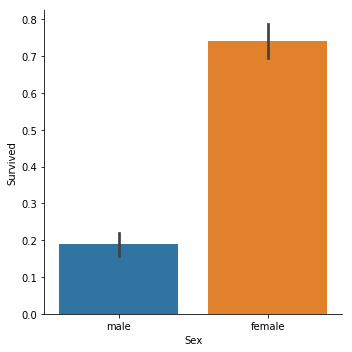

In [18]:
sns.catplot(x = 'Sex', y = 'Survived', kind = 'bar', data=train);

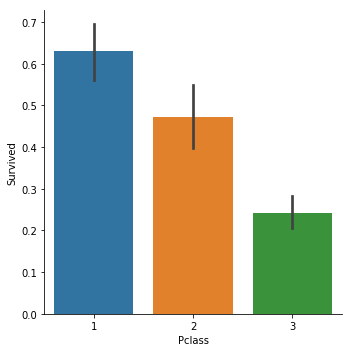

In [19]:
sns.catplot(x = 'Pclass', y = 'Survived', kind = 'bar', data=train);

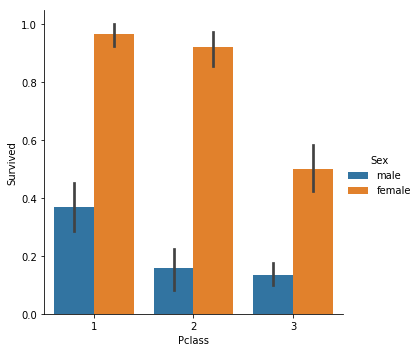

In [21]:
sns.catplot(x = 'Pclass', y = 'Survived', kind = 'bar', hue = 'Sex', data = train);

In [38]:
X_train = train.loc[:, ['Sex', 'Pclass']]
y_train = train['Survived']
X_test = test.loc[:, ['Sex', 'Pclass']]

In [42]:
X_train = pd.get_dummies(X_train, columns = ['Sex', 'Pclass'], drop_first = True)
X_test = pd.get_dummies(X_test, columns = ['Sex', 'Pclass'], drop_first = True)

In [25]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
logreg.predict_proba(X_test)[:,1]

array([0.10496527, 0.58537091, 0.24906911, 0.10496527, 0.58537091,
       0.10496527, 0.58537091, 0.24906911, 0.58537091, 0.10496527,
       0.10496527, 0.39478666, 0.88704025, 0.24906911, 0.88704025,
       0.79971453, 0.24906911, 0.10496527, 0.58537091, 0.58537091,
       0.39478666, 0.10496527, 0.88704025, 0.39478666, 0.88704025,
       0.10496527, 0.88704025, 0.10496527, 0.39478666, 0.10496527,
       0.24906911, 0.24906911, 0.58537091, 0.58537091, 0.39478666,
       0.10496527, 0.58537091, 0.58537091, 0.10496527, 0.10496527,
       0.10496527, 0.39478666, 0.10496527, 0.79971453, 0.88704025,
       0.10496527, 0.39478666, 0.10496527, 0.88704025, 0.58537091,
       0.39478666, 0.24906911, 0.79971453, 0.88704025, 0.24906911,
       0.10496527, 0.10496527, 0.10496527, 0.10496527, 0.88704025,
       0.10496527, 0.24906911, 0.10496527, 0.58537091, 0.39478666,
       0.79971453, 0.58537091, 0.39478666, 0.39478666, 0.88704025,
       0.58537091, 0.10496527, 0.58537091, 0.39478666, 0.88704

In [47]:
logreg.intercept_

array([2.06085883])

In [48]:
coeffs = pd.DataFrame({
    'Var': X_train.columns,
    'Weight': logreg.coef_[0]
})
coeffs

,Var,Weight
0,Sex_male,-2.488094
1,Pclass_2,-0.676348
2,Pclass_3,-1.715997


In [50]:
output = X_train.dot(logreg.coef_.T) + logreg.intercept_
output

,0
0,-2.143233
1,2.060859
2,0.344861
3,2.060859
4,-2.143233
5,-2.143233
6,-0.427235
7,-2.143233
8,0.344861
9,1.384511


In [51]:
sigmoid(output)

,0
0,0.104965
1,0.887040
2,0.585371
3,0.887040
4,0.104965
5,0.104965
6,0.394787
7,0.104965
8,0.585371
9,0.799715


In [52]:
preds = logreg.predict(X_test)

lm_predictions = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived': preds
})

In [55]:
lm_predictions.to_csv('../data/titanic/ts_predictions0.csv',
                      index = False)

In [57]:
rfc = RandomForestClassifier()

In [58]:
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
rfc.feature_importances_

array([0.72249992, 0.02611399, 0.25138609])

In [62]:
pd.DataFrame({
    'Features': X_train.columns,
    'Importance': rfc.feature_importances_
}).sort_values('Importance', ascending = False)

,Features,Importance
0,Sex_male,0.722500
2,Pclass_3,0.251386
1,Pclass_2,0.026114


In [63]:
rfc_preds = rfc.predict(X_test)

In [64]:
rfc_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
rfc_predictions = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': rfc_preds
})

In [67]:
rfc_predictions.to_csv('../data/titanic/rfc_predictions0.csv',
                       index = False)